In [263]:
import datetime
import pandas as pd
import pandas_ta as pata
import numpy as np
import ta 
import matplotlib as mpl

import matplotlib.pyplot as plt


In [226]:
df = pd.read_csv('../data/sp100.csv')
date_time = pd.to_datetime(df.pop('Date'),
                           format='%Y.%m.%d')
df.head()


,Open,High,Low,Close,Adj Close,Volume
0,54.950001,54.950001,54.950001,54.950001,54.950001,106920000
1,54.580002,54.580002,54.580002,54.580002,54.580002,120960000
2,53.560001,53.560001,53.560001,53.560001,53.560001,106880000
3,53.029999,53.029999,53.029999,53.029999,53.029999,109400000
4,52.270000,52.270000,52.270000,52.270000,52.270000,97320000


In [227]:

window_size = 60

In [228]:
def plot(name):
    mean = df.mean()
    std = df.std()
    df_std =(df-mean)/std

    real = df[name]
    real.index = date_time

    std_real = df_std[name]
    std_real.index = date_time

    fig, axs = plt.subplots(2)
    axs[0].plot(real)
    axs[1].plot(std_real)

In [229]:
#SMA -> Simple moving average

# df['SMA_10'] = df['Close'].rolling(window=10).mean()
# df['SMA_20'] = df['Close'].rolling(window=20).mean()
# df['SMA_50'] = df['Close'].rolling(window=50).mean()
# df['SMA_100'] = df['Close'].rolling(window=100).mean()
# df['SMA_200'] = df['Close'].rolling(window=200).mean()
# df[f'SMA_{window_size}'] = df['Close'].rolling(window=window_size).mean()


# plot('SMA_10')


In [230]:
# df['EMA'] = df['Close'].ewm(span= window_size , adjust=False).mean()

# df
# ema_10=ta.trend.EMAIndicator(df['Close'],window=10)
# ema_20=ta.trend.EMAIndicator(df['Close'],window=20)
# ema_50=ta.trend.EMAIndicator(df['Close'],window=50)
# ema_100=ta.trend.EMAIndicator(df['Close'],window=100)
# ema_200=ta.trend.EMAIndicator(df['Close'],window=200)
# ema_windowsize=ta.trend.EMAIndicator(df['Close'],window=window_size)

# df['EMA_10']=ema_10.ema_indicator()
# df['EMA_20']=ema_10.ema_indicator()
# df['EMA_50']=ema_10.ema_indicator()
# df['EMA_100']=ema_10.ema_indicator()
# df['EMA_200']=ema_10.ema_indicator()
# df[f'EMA_{window_size}']=ema_10.ema_indicator()

# name = 'EMA_100'
# plot(name)



In [231]:
#MACD

# macd=ta.trend.MACD(df['Close'])
# df['MACD']=macd.macd()
# df['MACD_Signal']=macd.macd_signal()
# df['MACD_Diff']=macd.macd_diff()

# plot('MACD_Diff')


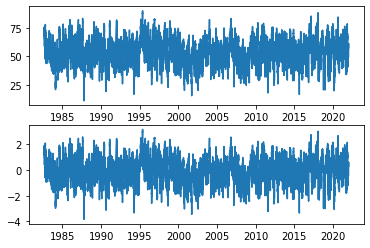

In [232]:
#RSI

rsi = ta.momentum.RSIIndicator(df['Close'])
df['RSI']= rsi.rsi()

plot('RSI')


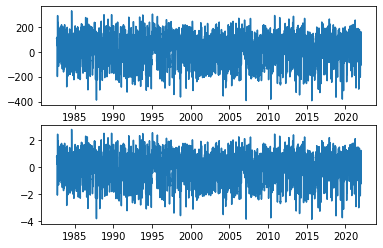

In [233]:
#CCI

CCI = ta.trend.CCIIndicator(high=df['High'],low=df['Low'],close=df['Close'])
df['CCI']=CCI.cci()

plot('CCI')

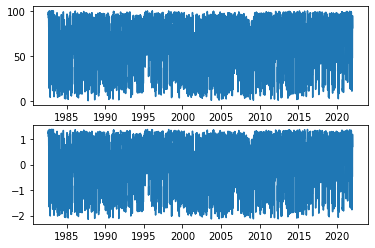

In [234]:
Stochastic= ta.momentum.StochasticOscillator(close=df['Close'],high=df['High'],low=df['Low'])
df['STOCH']=Stochastic.stoch()
df['STOCH_SIGNAL']=Stochastic.stoch_signal()


plot('STOCH_SIGNAL')

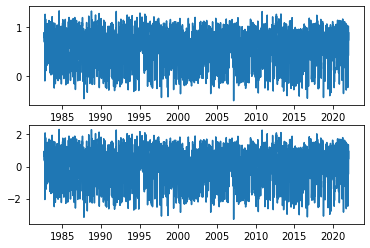

In [235]:
#Bollinger Bands

Bollinger = ta.volatility.BollingerBands(close=df['Close'])
# df['MA20'] = df['Close'].rolling(window=20).mean()
# df['20dSTD'] = df['Close'].rolling(window=20).std() 

# df['Upper'] = df['MA20'] + (df['20dSTD'] * 2)
# df['Lower'] = df['MA20'] - (df['20dSTD'] * 2)
# df.tail()

# df['Boll_High']=Bollinger.bollinger_hband()
# df['Boll_Low']=Bollinger.bollinger_lband()
# df['Boll_AVG']=Bollinger.bollinger_mavg()
df['Boll_Percent']=Bollinger.bollinger_pband()

plot('Boll_Percent')


In [236]:
# ATR = ta.volatility.AverageTrueRange(close=df['Close'],high=df['High'],low=df['Low'])
# df['ATR']=ATR.average_true_range()

# plot('ATR')

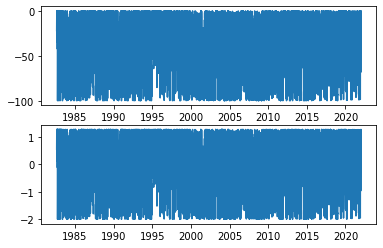

In [237]:

#Williams %R

WilliamsRIndicator=ta.momentum.WilliamsRIndicator(close=df['Close'],high=df['High'],low=df['Low'])
df['WILL_R']=WilliamsRIndicator.williams_r()

plot('WILL_R')

In [238]:

# OBV= ta.volume.OnBalanceVolumeIndicator(close=df['Close'],volume=df['Volume'])
# df['OBV']=OBV.on_balance_volume()

# plot('OBV')


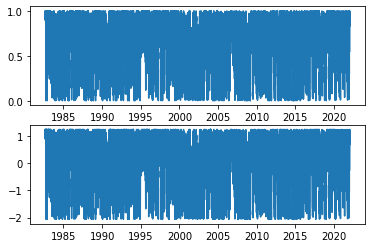

In [239]:
dcc= ta.volatility.DonchianChannel(high=df['High'],low=df['Low'],close=df['Close'])
# df['DON_CHIAN_hband']=dcc.donchian_channel_hband()
# df['DON_CHIAN_lband']=dcc.donchian_channel_lband()
# df['DON_CHIAN_mband']=dcc.donchian_channel_mband()
df['DON_CHIAN_pband']=dcc.donchian_channel_pband()

plot('DON_CHIAN_pband')

In [240]:
# vwap = ta.volume.VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume'])
# df['VWAP']=vwap.volume_weighted_average_price()

# plot('VWAP')

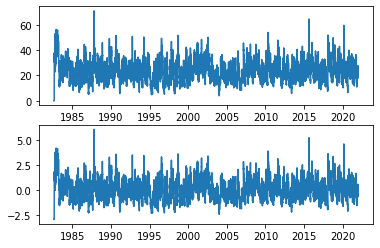

In [241]:
ADX=ta.trend.ADXIndicator(high=df['High'],low=df['Low'],close=df['Close'])
df['ADX_Pos']=ADX.adx_pos()
df['ADX_Neg']=ADX.adx_neg()

plot('ADX_Neg')

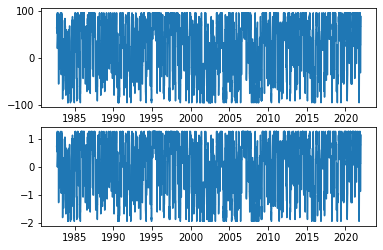

In [242]:
Aroon = ta.trend.AroonIndicator(close=df['Close'])
df['Aroon']= Aroon.aroon_indicator()

plot('Aroon')

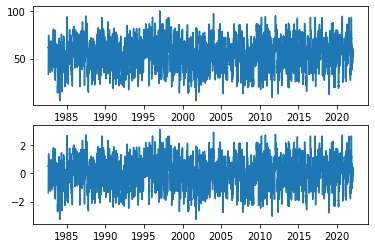

In [243]:
MFI = ta.volume.MFIIndicator(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume'])
df['MFI']=MFI.money_flow_index()

plot('MFI')

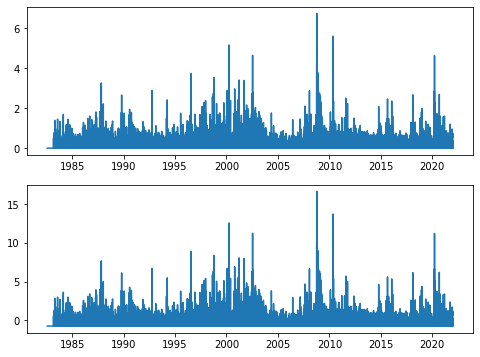

In [262]:

a = []
a = (df['Close']-df['Open'])*100/df['High']
df['Candel_Body'] = a
candel_upper_shadow = []
candel_lower_shadow = []

for i in range(len(df['Candel_Body'])):
    
    if(df['Close'][i] > df['Open'][i]):
        candel_upper_shadow.append( (df['High'][i] - df['Close'][i]) * 100 /df['High'][i] )
    else:
        candel_upper_shadow.append( (df['High'][i] - df['Open'][i]) * 100 /df['High'][i] )

    if(df['Close'][i] > df['Open'][i]):
        candel_lower_shadow.append( (df['Open'][i] - df['Low'][i]) * 100 /df['High'][i] )
    else:
        candel_lower_shadow.append( (df['Close'][i] - df['Low'][i]) * 100 /df['High'][i] )

df['Candel_Upper_Shadow']=candel_upper_shadow
df['Candel_Lower_Shadow']=candel_lower_shadow  

plot('Candel_Lower_Shadow')

In [261]:

# df.pop('Unnamed: 0')


# df['Date'] = date_time
# df = df.drop(labels=[i for i in range(158)], axis=0)
# df = df.reset_index()
# df.pop('index')
# df.head()
# df.to_csv('../data/sp100_Candel_With_Indicator.csv')

# df.plot(subplots=True)
# data=data.reset_index()
# data.pop('index')
# data.to_csv('data/sp100_indicator_1990.csv')
